In [3]:
import graph
import disease
import pandas as pd
import matplotlib.pyplot as plt 
import pylab as pl
import numpy as np
import collections
from Params import *
%matplotlib inline

In [22]:

    
def distGraph(dist,params, save=False,filename="output",basic=False,numTrials = 1000):
    '''
    Given a distribution dictionary, this function graphs the distribution
    Include a save option later
    '''
    #numTrials = 1000.0
    d = collections.OrderedDict(sorted(dist.items()))
    newD = makeRanges(d,20)
    df = pd.DataFrame.from_dict(newD,orient="index")
    df[1]=df.index
    df[0] = df[0]/float(numTrials)
    ind = np.array(df[1])
    
    #plt.suptitle("Distribution of Reproductive Number",fontsize=14)
    print(len(df[0]))
    fig, ax = plt.subplots(1)
    x_pos = formatGraph(ax,params,numTrials,df,basic,)
    plt.bar(x_pos,df[0],color="gray")
    
    if save:
        #fig = pyplot.get_figure()
        #fig = plt.figure()
        plt.savefig('graphDir/'+filename+'.pdf')
        plt.clf()
        
def getTicks(numTrials,df):
    pos = []
    ticks =[]
    for i in range(len(df)):
        if (i)%5 == 0:
            pos.append(i)
            ticks.append(df[1].iloc[i])
    return pos, ticks
        
    
def makeRanges(d,numColumns):
    res = {}
    keys = d.keys()
    
    mini = keys[0]
    maxi = keys[len(d)-1]
    diff = maxi - mini
    stepSize = diff/numColumns
    currentRange = mini+stepSize
    k = mini
    acc = 0
    for k,v in d.iteritems():         
        if k < currentRange or eq(k,currentRange):
            acc +=v
            res["%.3f" %(currentRange)] = acc
        elif k > currentRange:
            res["%.3f" %(currentRange)] = acc
            while k > currentRange or eq(k,currentRange):
                
                currentRange += stepSize
                res["%.3f" %(currentRange)] = 0
            acc = v
        else:
            print "lost: "+str((k,v))
        
    res["%.3f" %(currentRange)] = acc
   
    res= collections.OrderedDict(sorted(res.items()))
    
    if not eq(k,currentRange):
        res.popitem()
        temp = res.popitem()
        lastRange = temp[0]
        lastVal = temp[1]
        
        res[lastRange] =v + lastVal
    print(len(res.keys()))
    return res
def eq( a, b, eps=0.000001 ):
    return abs(a - b) <= eps

def formatGraph(ax,params, numTrials,df,basic):
    if basic: subTitle="Basic "
    else: subTitle=""
    #textstr = '$\mu=%.2f$\n $\mathrm{median}=%.2f$\n $\sigma=%.2f$'%(.234,.2345, .2345)
    textstr = "$\mathrm{k}=%d$\n$\mathrm{p}=%.2f %s$\n$\mathrm{N}=%d$\n$\\rho =%2.2f %s$  \n$\\nu=%2.2f $"%(params.k,params.p * 100,'\%',params.numVerts,params.connectionProb *100,'\%',params.percentVacc*100)+"%"
    ax.text(0.05, 0.95, textstr, transform=ax.transAxes, fontsize=10,verticalalignment='top')
    
    
    plt.suptitle("Distribution of %sReproductive Number" %(subTitle), fontsize=14,fontname ="Times")
    x_pos = np.arange(len(df[0]))
    lst1,lst2 = getTicks(numTrials,df)
    plt.xticks(lst1,lst2,horizontalalignment="left")
    plt.ylabel('Frequency',fontname="Times")
    plt.xlabel('R',fontname="Times")
    
    return x_pos


20
20


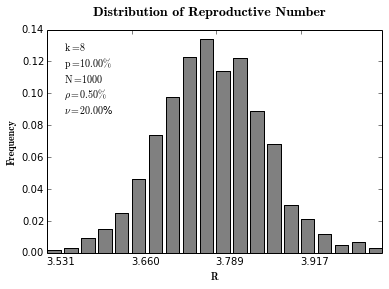

In [23]:
params = Params(8,.1,1000,.005,200) #8, .1, 0, 200*(i+1)
for i in range(1):
    distGraph(lst[i],params)

In [116]:
'''
titleLst = ["Dist_Repoductive_Num_20_Percent","Dist_Repoductive_Num_40_Percent","Dist_Repoductive_Num_60_Percent","Dist_Repoductive_Num_80_Percent","Dist_Repoductive_Num_100_Percent"]
distLst = []
for i in range(4):
    trials = 1000
    dist = {}
    connectionLst = []
    basic = False
    for x in range(0,trials):
        if x%50 == 0: print(x)
        g = graph.Graph(8, .1, 0, 200*(i+1))   #k,p,r,%infected,%vaccinated
        g.makeVertices(1000)         #of people
        g.makeConnections(.005)         #prob they are connected
        r = g.calculateR(basic)
    #print(r)
        if r not in dist: #problem with float equality    
            dist[r]=1
        else:
            dist[r] += 1
        distLst.append(dist)
    distGraph(dist,save =True,filename=titleLst[i],basic = basic,numTrials=trials)

#for vert in g.getVertices():
#    x =len(vert.getConnections())  
#    connectionLst.append(x)
    
#sum(connectionLst)/250.0
'''

'\ntitleLst = ["Dist_Repoductive_Num_20_Percent","Dist_Repoductive_Num_40_Percent","Dist_Repoductive_Num_60_Percent","Dist_Repoductive_Num_80_Percent","Dist_Repoductive_Num_100_Percent"]\ndistLst = []\nfor i in range(4):\n    trials = 1000\n    dist = {}\n    connectionLst = []\n    basic = False\n    for x in range(0,trials):\n        if x%50 == 0: print(x)\n        g = graph.Graph(8, .1, 0, 200*(i+1))   #k,p,r,%infected,%vaccinated\n        g.makeVertices(1000)         #of people\n        g.makeConnections(.005)         #prob they are connected\n        r = g.calculateR(basic)\n    #print(r)\n        if r not in dist: #problem with float equality    \n            dist[r]=1\n        else:\n            dist[r] += 1\n        distLst.append(dist)\n    distGraph(dist,save =True,filename=titleLst[i],basic = basic,numTrials=trials)\n\n#for vert in g.getVertices():\n#    x =len(vert.getConnections())  \n#    connectionLst.append(x)\n    \n#sum(connectionLst)/250.0\n'

In [27]:
w = {2.15568161015: 1, 2.2274427416899996: 2, 2.34362743085: 2, 2.2906608813799996: 8, 2.1528339461999995: 1, 2.2946476109099994: 2, 2.2217474137899993: 4, 2.3179984552999997: 2, 2.3459055620099996: 3, 2.1471386182999996: 3, 2.3624220129199993: 2, 2.2160520858899995: 5, 2.3328063078399994: 1, 2.2132044219399996: 4, 2.2843960206899996: 4, 2.2741444304699994: 2, 2.2365552663299995: 2, 2.2103567579899996: 3, 2.2245950777399996: 2, 2.3083163978699996: 6, 2.1357479624999995: 1, 2.2752834960499997: 4, 2.335084438999999: 3, 2.294078078119999: 1, 2.1329002985499996: 1, 2.30432966834: 3, 2.3413492996899996: 1, 2.2018137661399995: 1, 2.2604756435099995: 4, 2.1989661021899995: 1, 2.34248836527: 1, 2.3316672422599996: 1, 2.1961184382399996: 2, 2.24566779097: 4, 2.3419188324799998: 1, 2.2695881681499994: 2, 2.2650319058299995: 2, 2.2935085453299995: 4, 2.30148200439: 2, 2.19042311034: 3, 2.2621842418799996: 4, 2.3476141603799996: 2, 2.3550180866499995: 1, 2.18757544639: 1, 2.2593365779299996: 7, 2.3145812585599996: 1, 2.2564889139799997: 5, 2.4227924886599994: 1, 2.3402102341099997: 1, 2.1818801184899996: 1, 2.1790324545399997: 1, 2.25876704514: 5, 2.30262106997: 1, 2.17618479059: 1, 2.3823556605699996: 1, 2.2787006927899998: 4, 2.2450982581799996: 5, 2.1704894626899995: 1, 2.3937463163699997: 1, 2.3123031273999994: 8, 2.2394029302799994: 3, 2.3140117257699995: 1, 2.3481836931699998: 1, 2.1647941347899997: 1, 2.3282500455199995: 3, 2.3943158491599994: 2, 2.2337076023799995: 6, 2.2188997498399994: 1, 2.2638928402499996: 7, 2.2308599384299996: 4, 2.2758530288399994: 7, 2.2280122744799997: 2, 2.2866741518499993: 3, 2.2724358320999998: 3, 2.22516461053: 1, 2.3686868736099993: 1, 2.22231694658: 2, 2.3612829473399994: 2, 2.3544485538599997: 3, 2.2194692826299995: 3, 2.2912304141699993: 8, 2.2883827502199994: 9, 2.29692574207: 7, 2.1420128231899995: 1, 2.2137739547299997: 2, 2.2730053648899995: 5, 2.3441969636399995: 2, 2.3276805127299993: 8, 2.21092629078: 4, 2.2929390125399993: 6, 2.3447664964299997: 1, 2.2080786268299994: 1, 2.3265414471499994: 2, 2.2052309628799995: 3, 2.3578657505999994: 1, 2.2023832989299996: 3, 2.33907116853: 1, 2.3191375208799996: 6, 2.1995356349799997: 2, 2.2581975123499993: 4, 2.2821178895299994: 4, 2.1249268394899996: 2, 2.2701577009399996: 5, 2.3020515371799997: 5, 2.3658392096599994: 1, 2.1938403070799994: 1, 2.33793210295: 4, 2.1909926431299995: 1, 2.37096500477: 2, 2.25990611072: 6, 2.1852973152299997: 1, 2.3259719143599993: 5, 2.2542107828199995: 7, 2.2553498483999994: 3, 2.2075090940399997: 2, 2.2513631188699996: 8, 2.2673100369899997: 6, 2.2485154549199997: 4, 2.3202765864599995: 5, 2.1739066594299996: 1, 2.3174289225099995: 2, 2.33565397179: 3, 2.3128726601899996: 4, 2.24282012702: 5, 2.2826874223199995: 5, 2.3487532259599995: 3, 2.3834947261499995: 1, 2.3806470621999996: 1, 2.3874814556799997: 1, 2.2371247991199996: 3, 2.20466143009: 1, 2.2342771351699997: 5, 2.2525021844499995: 4, 2.2992038732299998: 4, 2.23142947122: 1, 2.3003429388099996: 6, 2.3601438817599996: 1, 2.298634340439999: 3, 2.2257341433199995: 6, 2.33622350458: 3, 2.2228864793699996: 4, 2.2804092911599994: 2, 2.31515079135: 3, 2.2200388154199997: 6, 2.3162898569299997: 3, 2.2735748976799997: 7, 2.2171911514699993: 1, 2.2855350862699995: 3, 2.2849655534799993: 4, 2.2143434875199994: 7, 2.2114958235699995: 5, 2.3510313571199997: 2, 2.3595743489699994: 2, 2.2086481596199996: 2, 2.3521704226999995: 1, 2.37552126709: 2, 2.3066077994999996: 6, 2.2058004956699997: 3, 2.3493227587499996: 2, 2.3225547176199997: 3, 2.2712967665199995: 8, 2.2029528317199993: 1, 2.3464750947999997: 2, 2.2707272337299997: 2, 2.2001051677699994: 1, 2.2718662993099996: 4, 2.2468068565499997: 6, 2.19668797103: 1, 2.1972575038199995: 3, 2.2690186353599997: 3, 2.1944098398699996: 3, 2.1915621759199997: 1, 2.29977340602: 5, 2.1169533804299996: 1, 2.3185679880899994: 3, 2.3254023815699996: 3, 2.2576279795599996: 3, 2.2319990040099995: 3, 2.3527399554899997: 1, 2.2559193811899996: 2, 2.1830191840699995: 2, 2.2798397583699996: 2, 2.3618524801299996: 1, 2.1801715201199996: 1, 2.2792702255799995: 4, 2.1773238561699997: 2, 2.3692564063999995: 1, 2.27756162721: 6, 2.2462373237599995: 2, 2.3214156520399993: 1, 2.2433896598099996: 3, 2.30603826671: 5, 2.3385016357399997: 1, 2.1687808643199995: 1, 2.3760907998799996: 1, 2.2889522830099995: 5, 2.2376943319099993: 3, 2.24111152865: 4, 2.2348466679599994: 3, 2.3231242504099994: 6, 2.4000111770599997: 1, 2.1602378724699998: 1, 2.3037601355499997: 7, 2.2974952748599993: 3, 2.2291513400599996: 1, 2.3009124716: 7, 2.2263036761099997: 7, 2.29806480765: 3, 2.2234560121599998: 1, 2.3168593897199994: 3, 2.2861046190599996: 1, 2.1488472166699997: 1, 2.2206083482099994: 6, 2.2838264878999994: 3, 2.3339453734199993: 2, 2.3197070536699997: 2, 2.2177606842599995: 4, 2.3322367750499993: 1, 2.2149130203099996: 5, 2.37210407035: 1, 2.33451490621: 1, 2.2120653563599997: 1, 2.2092176924099998: 3, 2.2769920944199997: 3, 2.3430578980599996: 2, 2.20637002846: 1, 2.2832569551099997: 9, 2.20352236451: 1, 2.2900913485899994: 4, 2.2006747005599996: 3, 2.3305281766799992: 1, 2.1978270366099997: 1, 2.26332330746: 5, 2.3647001440799995: 2, 2.3664087424499995: 1, 2.2667405041999995: 5, 2.19213170871: 1, 2.2764225616299996: 4, 2.2610451762999997: 3, 2.2747139632599995: 4, 2.2445287253899995: 4, 2.1864363808099996: 2, 2.3299586438899995: 2, 2.2923694797499996: 3, 2.1835887168599997: 1, 2.3271109799399996: 6, 2.3236937831999995: 2, 2.1807410529099998: 1, 2.2490849877099994: 2, 2.369825939189999: 1, 2.34533602922: 2, 2.2496545204999996: 7, 2.1750457250099995: 2, 2.2439591925999998: 6, 2.2416810614399996: 2, 2.3100249962399997: 5, 2.2656014386199996: 3, 2.1693503971099997: 1, 2.2536412500299994: 4, 2.34989229154: 3, 2.2382638646999995: 2, 2.1636550692099994: 1, 2.2325685367999997: 3, 2.3703954719799993: 2, 2.2297208728499998: 2, 2.3732431359299997: 1, 2.2268732089: 1, 2.2388333974899997: 5, 2.3071773322899998: 1, 2.2627537746699997: 3, 2.2240255449499995: 8, 2.2507935860799995: 5, 2.31059452903: 5, 2.2211778809999996: 2, 2.3607134145499993: 1, 2.1465690855099995: 2, 2.3094554634499995: 1, 2.3886205212599996: 1, 2.2154825530999998: 3, 2.3590048161799997: 1, 2.2126348891499994: 4, 2.3561571522299993: 1, 2.2097872251999995: 3, 2.2815483567399997: 4, 2.2963562092799994: 4, 2.2957866764899992: 5, 2.2069395612499996: 2, 2.2479459221299996: 7, 2.3077468650799995: 1, 2.3031906027599995: 4, 2.2040918972999997: 3, 2.3538790210699996: 1, 2.37722986546: 1, 2.2012442333499997: 4, 2.2878132174299997: 4, 2.1983965693999994: 4, 2.2684491025699995: 3, 2.1955489054499995: 1, 2.26787956978: 6, 2.2644623730399998: 6, 2.3407797669: 1, 2.2570584467699994: 1, 2.3293891110999994: 4, 2.1898535775499997: 1, 2.3111640618199996: 4, 2.3048992011299996: 3, 2.2781311599999996: 1, 2.1870059135999997: 1, 2.34704462759: 4, 2.2547803156099997: 1, 2.1841582496499994: 1, 2.2809788239499995: 4, 2.2530717172399997: 6, 2.3157203241399995: 4, 2.2502240532899997: 4, 2.24737638934: 6, 2.2183302170499997: 1, 2.33736257016: 3, 2.2422505942299997: 6, 2.26617097141: 2, 2.1699199299: 1, 2.3134421929799998: 5, 2.2952171436999995: 4, 2.16707226595: 2, 2.30888593066: 1, 2.3248328487799994: 1, 2.2359857335399997: 5, 2.2917999469599994: 3, 2.3219851848299995: 3, 2.3288195783099996: 5, 2.2331380695899994: 2, 2.41937529192: 1, 2.26161470909: 4, 2.2302904056399995: 8, 2.2872436846399995: 2, 2.3897595868399995: 1, 2.2405419958599997: 4}
 
x = {1.7473265997199998: 3, 1.6505060254199997: 2, 1.6818303288699996: 5, 1.7575781899399996: 3, 1.6579099516899998: 2, 1.7410617390299996: 3, 1.7057507060499997: 8, 1.6476583614699996: 1, 1.7177108946399997: 6, 1.6448106975199996: 1, 1.7883329605999998: 1, 1.7296710832299997: 4, 1.6972077141999997: 3, 1.70745930442: 5, 1.6419630335699997: 2, 1.7496047308799998: 2, 1.6624662140099997: 4, 1.7541609931999997: 3, 1.6744264025999998: 4, 1.6863865911899996: 5, 1.6391153696199998: 1, 1.7342273455499997: 5, 1.6937905174599999: 6, 1.63626770567: 1, 1.7080288372099999: 4, 1.7837766982799999: 3, 1.6334200417199995: 5, 1.6693006074899996: 1, 1.6767045337599997: 9, 1.6909428535099997: 3, 1.7199890257999997: 2, 1.7029030420999998: 6, 1.7740946408499998: 2, 1.6305723777699996: 1, 1.7365054767099997: 4, 1.7609953866799997: 3, 1.7444789357699997: 5, 1.6636052795899996: 9, 1.6630357467999997: 3, 1.7513133292499998: 4, 1.7205585585899996: 2, 1.6607576156399997: 2, 1.7330882799699998: 8, 1.6715787386499998: 4, 1.6835389272399996: 5, 1.6220293859199997: 2, 1.7376445422899998: 4, 1.7068897716299996: 4, 1.7171413618499998: 4, 1.7906110917599998: 1, 1.7268234192799996: 3, 1.6550622877399999: 5, 1.7627039850499997: 1, 1.6163340580199999: 1, 1.7239757553299997: 4, 1.7347968783399996: 5, 1.7103069683699998: 2, 1.6522146237899995: 2, 1.7017639765199997: 8, 1.7000553781499996: 8, 1.6493669598399996: 2, 1.6852475256099997: 1, 1.7598563210999996: 1, 1.7758032392199996: 1, 1.7484656652999997: 5, 1.6465192958899997: 2, 1.7644125834199995: 3, 1.7478961325099998: 3, 1.6795521977099996: 4, 1.6687310746999997: 2, 1.7570086571499997: 2, 1.6806912632899997: 3, 1.6926514518799998: 3, 1.6049434022199998: 1, 1.7404922062399997: 3, 1.6829693944499997: 4, 1.7251148209099996: 3, 1.6738568698099998: 7, 1.7826376326999995: 2, 1.6351286400899998: 1, 1.6761350009699998: 4, 1.7234062225399995: 4, 1.6254465826599998: 1, 1.6801217304999998: 5, 1.6732873370199999: 6, 1.6681615419099995: 4, 1.7211280913799996: 2, 1.7382140750799997: 5, 1.7689688457399997: 1, 1.7216976241699997: 4, 1.7547305259899997: 1, 1.7051811732599997: 5, 1.6653138779599996: 2, 1.7370750094999996: 8, 1.7165718290599996: 1, 1.7957368868699997: 2, 1.6265856482399996: 4, 1.6983467797799998: 7, 1.8002931491899996: 1, 1.6778435993399998: 5, 1.6898037879299999: 2, 1.6237379842899997: 2, 1.6596185500599998: 2, 1.7131546323199998: 8, 1.8008626819799995: 1, 1.6567708861099997: 6, 1.6989163125699998: 4, 1.7780813703799996: 2, 1.7615649194699996: 4, 1.61804265639: 1, 1.7775118375899996: 1, 1.6584794844799997: 2, 1.7063202388399996: 6, 1.7581477227299998: 2, 1.6510755582099996: 5, 1.7524523948299997: 2, 1.6482278942599997: 3, 1.7746641736399997: 5, 1.7085983699999998: 4, 1.7735251080599996: 2, 1.6453802303099996: 4, 1.7530219276199996: 2, 1.6749959353899997: 7, 1.6869561239799997: 7, 1.6425325663599997: 1, 1.7142936978999996: 5, 1.7023335093099996: 7, 1.6858170583999996: 6, 1.7188499602199996: 6, 1.6038043366399997: 1, 1.6755654681799999: 5, 1.7604258538899997: 5, 1.7752337064299997: 1, 1.7535914604099998: 1, 1.6727178042299997: 5, 1.6556318205299998: 3, 1.7034725748899997: 7, 1.7154327634799997: 6, 1.6698701402799996: 5, 1.6823998616599998: 5, 1.7518828620399998: 2, 1.7160022962699997: 8, 1.7467570669299999: 5, 1.6670224763299997: 4, 1.7393531406599996: 5, 1.7638430506299996: 2, 1.6641748123799998: 3, 1.6721482714399998: 1, 1.6841084600299996: 8, 1.6960686486199998: 3, 1.5895660168899997: 1, 1.7439094029799995: 1, 1.8025712803499998: 1, 1.7860548294399998: 2, 1.6225989187099998: 1, 1.7302406160199997: 4, 1.7137241651099997: 7, 1.7387836078699996: 1, 1.7222671569599997: 4, 1.6954991158299997: 7, 1.6197512547599997: 1, 1.7273929520699995: 6, 1.6527841565799999: 4, 1.7006249109399998: 7, 1.6408239679899996: 3, 1.6169035908099998: 2, 1.6886647223499995: 4, 1.7108765011599998: 10, 1.7723860424799998: 1, 1.7422008046099997: 5, 1.7849157638599997: 1, 1.6920819190899998: 7, 1.6613271484299996: 3, 1.6499364926299995: 2, 1.7353664111299998: 3, 1.6880951895599996: 6, 1.6112082629099997: 1, 1.7621344522599995: 3, 1.6812607960799997: 4, 1.6932209846699997: 4, 1.7256843536999995: 2, 1.5724800331899997: 1, 1.76498211621: 1, 1.8037103459299997: 1, 1.6413935007799998: 4, 1.6442411647299997: 5, 1.6385458368299997: 1, 1.7820680999099996: 2, 1.8253525919499998: 1, 1.6618966812199998: 7, 1.7097374355799995: 5, 1.6356981728799997: 4, 1.7792204359599997: 1, 1.7695383785299998: 1, 1.7683993129499997: 1, 1.7666907145799997: 3, 1.7120155667399997: 8, 1.6328505089299996: 1, 1.7046116404699996: 7, 1.7877634278099996: 1, 1.6300028449799997: 2, 1.6658834107499996: 7, 1.6784131321299998: 5, 1.6903733207199998: 4, 1.6664529435399997: 5, 1.6271551810299998: 1, 1.7501742636699997: 4, 1.7325187471799997: 5, 1.6601880828499997: 3, 1.7900415589699996: 1, 1.7456180013499996: 4, 1.8065580098799998: 1, 1.6573404188999998: 5, 1.7125850995299998: 4, 1.67100920586: 5, 1.6470888286799996: 6, 1.6544927549499997: 1, 1.7308101488099998: 8, 1.7245452881199996: 5, 1.7786509031699997: 2, 1.7661211817899998: 1, 1.7291015504399998: 4, 1.5798839594599998: 1, 1.7592867883099996: 2, 1.7701079113199998: 2, 1.6487974270499997: 2, 1.7564391243599997: 4, 1.7228366897499996: 2, 1.6396849024099998: 2, 1.6516450909999996: 1, 1.7319492143899997: 5, 1.6994858453599997: 3, 1.6459497630999997: 1, 1.7114460339499997: 9, 1.7951673540799997: 1, 1.7672602473699999: 1, 1.7313796815999998: 5, 1.6431020991499996: 2, 1.6789826649199997: 2, 1.7182804274299996: 7, 1.7285320176499999: 3, 1.6977772469899997: 5, 1.7359359439199997: 3, 1.6402544351999997: 3, 1.7194194930099997: 4, 1.7040421076799996: 6, 1.6083605989599996: 2, 1.6374067712499998: 2, 1.7461875341399995: 2, 1.7399226734499997: 3, 1.7148632306899998: 9, 1.6875256567699997: 4, 1.6943600502499998: 3, 1.6915123863: 4, 1.6704396730699995: 8, 1.7655516489999998: 2, 1.7490351980899999: 5, 1.6675920091199996: 1, 1.7450484685599996: 3, 1.7091679027899995: 9, 1.6846779928199997: 4, 1.7553000587799996: 3, 1.6966381814099998: 7, 1.6647443451699997: 4, 1.7427703373999996: 6, 1.7262538864899997: 4, 1.7558695915699998: 1, 1.6260161154499997: 1, 1.7336578127599998: 2, 1.7507437964599997: 2, 1.7416312718199995: 7, 1.6590490172699996: 4, 1.6949295830399997: 7, 1.7011944437299997: 8, 1.6772740665499997: 7, 1.68923425514: 6, 1.6562013533199997: 3, 1.7729555752699997: 2, 1.7279624848599995: 4, 1.6533536893699998: 1}
 
y = {1.0764169730999997: 1, 1.0735693091499998: 1, 1.1812110064599997: 6, 1.1424827767399997: 8, 1.1003373502799998: 5, 1.1122975388699998: 5, 1.1396351127899997: 9, 1.1675422194999996: 4, 1.1874758671499999: 3, 1.1009068830699997: 1, 1.13393978489: 10, 1.0593309893999998: 1, 1.1669726867099997: 3, 1.1971579245799997: 1, 1.1641250227599997: 4, 1.1612773588099998: 8, 1.1692508178699998: 3, 1.1453304406899998: 6, 1.19317119505: 2, 1.0866685633199997: 6, 1.2011446541099997: 2, 1.0838208993699998: 1, 1.1943102606299998: 1, 1.1806414736699997: 1, 1.1083108093399998: 4, 1.1840586704099998: 1, 1.1305225881499998: 6, 1.0707216451999997: 2, 1.1185623995599998: 2, 1.26208466264: 1, 1.10546314539: 7, 1.06673491567: 2, 1.1356483832599997: 6, 1.1328007193099998: 8, 1.1743766129799997: 1, 1.12995305536: 6, 1.1629859571799996: 3, 1.05591379266: 1, 1.1037545470199999: 2, 1.0798341698399998: 1, 1.1601382932299997: 5, 1.1572906292799998: 2, 1.1937407278399998: 3, 1.15444296533: 5, 1.11571473561: 2, 1.1487476374299996: 6, 1.1458999734799997: 9, 1.1367874488399998: 7, 1.07698650589: 1, 1.1071717437599997: 2, 1.1043240798099998: 2, 1.19089306389: 1, 1.0655958500899998: 1, 1.1253967930399997: 4, 1.1288139897799998: 6, 1.0980592191199998: 1, 1.0741388419399998: 1, 1.0860990305299998: 2, 1.20683998201: 1, 1.1698203506599998: 5, 1.0900857600599998: 1, 1.1948797934199997: 1, 1.1658336211299998: 4, 1.17266801461: 3, 1.1561515636999997: 5, 1.1533038997499998: 4, 1.1880453999399998: 1, 1.1145756700299998: 8, 1.1504562358: 7, 1.0758474403099998: 3, 1.09521155517: 6, 1.1430523095299998: 13, 1.1191319323499997: 4, 1.1447609078999996: 7, 1.1419132439499997: 9, 1.1390655799999998: 8, 1.1362179160499999: 10, 1.1789328752999997: 4, 1.0974896863299999: 5, 1.2079790475899999: 1, 1.1914625966799999: 1, 1.1664031539199997: 8, 1.15216483417: 4, 1.1282444569899999: 5, 1.1276749241999997: 4, 1.1635554899699998: 4, 1.0889466944799997: 2, 1.1248272602499998: 13, 1.20456185085: 1, 1.1219795962999999: 6, 1.0473708008099998: 1, 1.0445231368599999: 1, 1.1014764158599997: 5, 1.1493171702199996: 7, 1.0895162272699999: 1, 1.1105889404999998: 4, 1.1077412765499999: 7, 1.2153829738599997: 2, 1.1851977359899997: 5, 1.1920321294699998: 2, 1.1766547441399997: 2, 1.1379265144199997: 6, 1.1988665229499997: 1, 1.0991982846999997: 5, 1.1322311865199999: 3, 1.07470837473: 1, 1.1225491290899998: 6, 1.17038988345: 4, 1.12938352257: 11, 1.1624164243899997: 4, 1.1595687604399998: 5, 1.1208405307199998: 6, 1.1567210964899999: 4, 1.1179928667699999: 11, 1.0792646370499999: 1, 1.18861493273: 2, 1.1555820309099998: 7, 1.13166165373: 9, 1.1481781046399997: 4, 1.1094498749199997: 7, 1.1846282031999997: 3, 1.1066022109699998: 9, 1.0678739812499998: 1, 1.0826818337899997: 3, 1.1709594162399999: 5, 1.1527343669599999: 7, 1.1646945555499997: 2, 1.1310921209399998: 9, 1.0923638912199998: 1, 1.2113962443299997: 1, 1.0536356614999998: 1, 1.1584296948599997: 7, 1.1197014651399997: 12, 1.1168538011899998: 9, 1.1162842683999998: 8, 1.0781255714699998: 1, 1.12596632583: 6, 1.1738070801899998: 5, 1.1140061372399999: 3, 1.1857672687799996: 1, 1.1470390390599996: 6, 1.1829196048299997: 3, 1.1441913751099997: 7, 1.1413437111599998: 7, 1.1026154814399998: 4, 1.0997678174899999: 3, 1.11115847329: 8, 1.1589992276499999: 5, 1.1350788504699998: 16, 1.05819192382: 1, 1.0912248256399997: 3, 1.1242577274599999: 6, 1.0855294977399998: 1, 1.12141006351: 3, 1.1834891376199996: 2, 1.0724302435699997: 1, 1.1202709979299998: 9, 1.0963506207499998: 4, 1.1800719408799998: 5, 1.1515953013799998: 7, 1.1128670716599998: 3, 1.1100194077099999: 8, 1.0712911779899998: 1, 1.14988670301: 5, 1.1402046455799997: 6, 1.1760852113499998: 5, 1.1373569816299998: 9, 1.1732375473999999: 4, 1.1174233339799997: 5, 1.1652640883399996: 5, 1.1772242769299999: 3, 1.0986287519099998: 3, 1.1345093176799999: 7, 1.2102571787499998: 2, 1.0599005221899997: 1, 1.0957810879599998: 3, 1.09293342401: 3, 1.2108267115399998: 1, 1.1618468915999998: 9, 1.2057009164299999: 1, 1.1231186618799998: 8, 1.0809732354199997: 1, 1.0843904321599998: 1, 1.0786951042599997: 2, 1.0906552928499997: 3, 1.1384960472099999: 5, 1.18633680157: 3, 1.0815427682099998: 2, 1.2370252198799998: 1, 1.1476085718499998: 4, 1.0729997763599997: 1, 1.1060326781799998: 4, 1.10318501423: 4, 1.0878076288999998: 3, 1.1715289490299998: 10, 1.1117280060799999: 5, 1.1720984818199998: 2, 1.1823500720399998: 3, 1.1333702520999998: 13, 1.20513138364: 1, 1.0946420223799997: 4, 1.1755156785599998: 1, 1.0917943584299998: 1, 1.1607078260199997: 9, 1.16868128508: 5, 1.1578601620699998: 4, 1.0969201535399997: 2, 1.1088803421299998: 6, 1.1550124981199998: 4, 1.0804037026299997: 3, 1.11343660445: 2, 1.1464695062699997: 7, 1.1436218423199997: 7, 1.1795024080899998: 2, 1.1048936125999997: 5, 1.1407741783699998: 11, 1.0940724895899998: 3, 1.1777938097199998: 5, 1.1903235310999998: 1, 1.1897539983099998: 3, 1.1020459486499998: 3, 1.1817805392499998: 4, 1.0633177189299998: 3, 1.2262040968699999: 1, 1.0935029567999999: 6, 1.1265358586199998: 5, 1.16811175229: 6, 1.12368819467: 4, 1.1271053914099998: 7, 1.17494614577: 1, 1.1151452028199997: 1, 1.08495996495: 3, 1.1926016622599998: 1, 1.2017141868999996: 1, 1.2000055885299998: 2, 1.1538734325399997: 7, 1.1510257685899998: 8}
 
z ={0.5478905439799999: 9, 0.5837711097499998: 8, 0.5695327899999999: 11, 0.6076914869299999: 1, 0.5382084865499999: 4, 0.5285264291199999: 1, 0.6105391508799999: 1, 0.5729499867399999: 13, 0.5547249374599998: 12, 0.5968703639199999: 5, 0.5906055032299998: 4, 0.5849101753299999: 6, 0.5450428800299999: 3, 0.5775062490599999: 10, 0.5940226999699999: 7, 0.5353608225999998: 6, 0.5621288637299999: 12, 0.5860492409099999: 4, 0.5615593309399999: 8, 0.5740890523199998: 12, 0.5985789622899998: 3, 0.5518772735099999: 14, 0.5888969048599999: 9, 0.5421952160799999: 3, 0.61395634762: 1, 0.5632679293099999: 10, 0.5325131586499999: 1, 0.5871883064899999: 9, 0.5752281179: 6, 0.52283110122: 1, 0.59459223276: 5, 0.5490296095599999: 5, 0.5524468062999999: 7, 0.6185126099399999: 1, 0.5763671834799999: 8, 0.5393475521299999: 2, 0.5644069948899999: 5, 0.5809234457999999: 11, 0.5296654946999999: 1, 0.5655460604699999: 13, 0.6179430771499999: 2, 0.5558640030399999: 4, 0.5894664376499998: 8, 0.5461819456099999: 5, 0.6099696180899998: 3, 0.6014266262399999: 3, 0.5364998881799998: 4, 0.5268178307499999: 1, 0.61167821646: 1, 0.5666851260499999: 13, 0.5171357733199999: 1, 0.5786453146399999: 8, 0.5433342816599999: 6, 0.6082610197199999: 4, 0.5336522242299999: 5, 0.6008570934499998: 5, 0.5797843802199999: 7, 0.6002875606599999: 3, 0.5598507325699998: 14, 0.5917445688099998: 10, 0.5501686751399999: 14, 0.5404866177099998: 2, 0.5581421341999999: 15, 0.6042742901899999: 1, 0.5308045602799999: 3, 0.60484382298: 3, 0.6037047574: 4, 0.5570030686199999: 10, 0.5928836343899998: 3, 0.6054133557699999: 5, 0.5473210111899999: 10, 0.5832015769599999: 6, 0.5701023227899998: 12, 0.5376389537599999: 1, 0.5826320441699998: 9, 0.5820625113799999: 11, 0.5638374620999999: 11, 0.5997180278699998: 2, 0.5541554046699999: 3, 0.5900359704399999: 4, 0.5444733472399998: 5, 0.5803539130099998: 9, 0.5951617655499999: 4, 0.6071219541399999: 1, 0.5347912898099999: 4, 0.5706718555799999: 6, 0.52510923238: 3, 0.5609897981499999: 9, 0.5604202653599999: 9, 0.58434064254: 11, 0.5513077407199999: 8, 0.5723804539499998: 20, 0.5416256832899998: 5, 0.53194362586: 2, 0.5735195195299998: 8, 0.5974398967099999: 4, 0.5222615684299999: 1, 0.5854797081199999: 7, 0.6094000852999999: 2, 0.5484600767699999: 10, 0.5387780193399999: 5, 0.5991484950799999: 2, 0.5746585851099998: 14, 0.52909596191: 2, 0.5626983965199999: 9, 0.5552944702499999: 13, 0.5456124128199998: 4, 0.6173735443599999: 1, 0.5877578392799999: 9, 0.5359303553899999: 3, 0.5757976506899999: 13, 0.6207907411: 1, 0.5262482979599999: 1, 0.5980094294999999: 6, 0.6019961590299998: 2, 0.5165662405299999: 1, 0.5883273720699999: 5, 0.56497652768: 8, 0.5427647488699999: 5, 0.5530163390899999: 15, 0.61281728204: 1, 0.53308269144: 6, 0.5689632572099999: 12, 0.5592811997799999: 9, 0.5780757818499999: 8, 0.51371857658: 1, 0.5495991423499998: 11, 0.5399170849199999: 7, 0.53023502749: 4, 0.5911750360199999: 5, 0.5564335358299999: 4, 0.6031352246099999: 2, 0.5467514783999999: 7, 0.5923141015999999: 5, 0.5370694209699999: 3, 0.5683937244199999: 11, 0.6458501838599998: 1, 0.5273873635399999: 2, 0.6162344787799999: 1, 0.5712413883699998: 15, 0.5535858718799999: 10, 0.5439038144499999: 4, 0.5814929785899998: 7, 0.5342217570199999: 1, 0.6059828885599999: 3, 0.59345316718: 7, 0.5245396995899999: 2, 0.5963008311299999: 2, 0.6111086836699998: 2, 0.5678241916299999: 16, 0.5507382079299998: 7, 0.5866187736999999: 4, 0.5587116669899999: 8, 0.5410561504999999: 2, 0.5769367162699999: 11, 0.6065524213499999: 2, 0.6088305525099998: 2, 0.5313740930699999: 2, 0.5672546588399999: 13, 0.5792148474299998: 9, 0.5575726014099999: 9, 0.5718109211599999: 11, 0.5661155932599999: 13, 0.5957312983399999: 3}

In [6]:
lst = [w,x,y,z]
for i in range (4):
    inp = collections.OrderedDict(sorted(lst[i].items()))
    ranges = makeRanges(inp,20)
    acc = 0
    for key,value in ranges.iteritems():
    #if float(key) <= 1.712 and float(key) >= 1.696:
        acc += value
    #    print(key, value)
        
        
    print "Value: "+str(acc)

20
Value: 1000
20
Value: 1000
20
Value: 1000
20
Value: 1000


In [29]:
titleLst = ["Dist_Repoductive_Num_20_Percent","Dist_Repoductive_Num_40_Percent","Dist_Repoductive_Num_60_Percent","Dist_Repoductive_Num_80_Percent","Dist_Repoductive_Num_100_Percent"]
lst = [w,x,y,z]

for i in range(4):
    params = Params(8,.1,1000,.005,200*(i+1))
    distGraph(lst[i],params,save =True,filename=titleLst[i])

20
20
20
20
20
20
20
20
